[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 300m → #1307 (misfit: 1.9m)
[BOREHOLE] 100m → None (misfit: 2.0m)
[BOREHOLE] 300m → None (misfit: 1.9m)
SNR: 1.0774
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(100, 300)


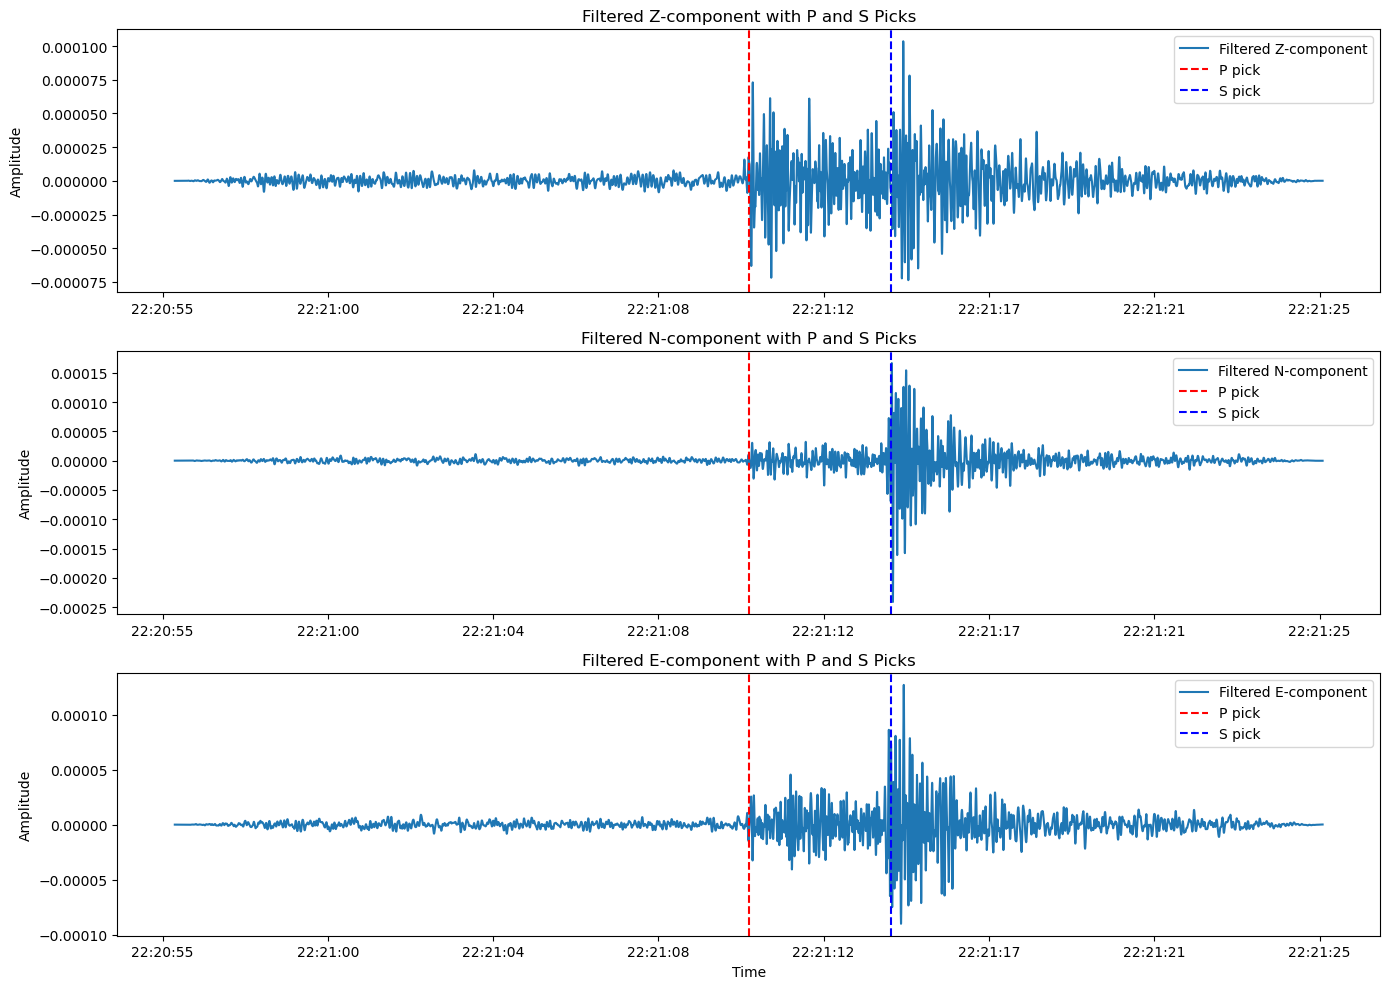

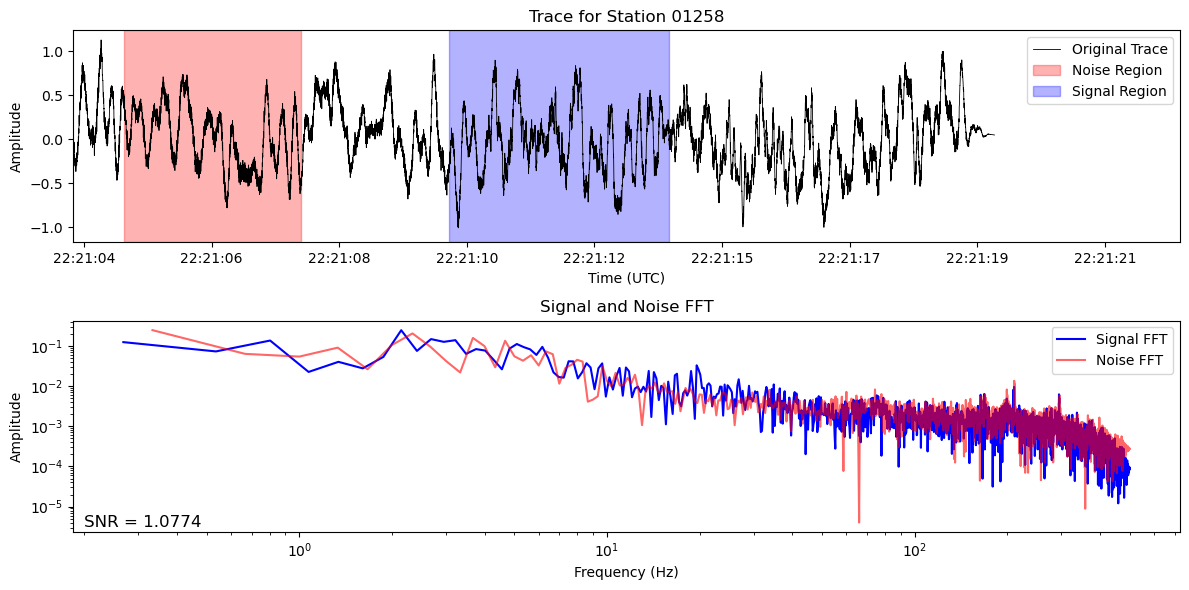

SNR: 1.1869
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(100, 300)


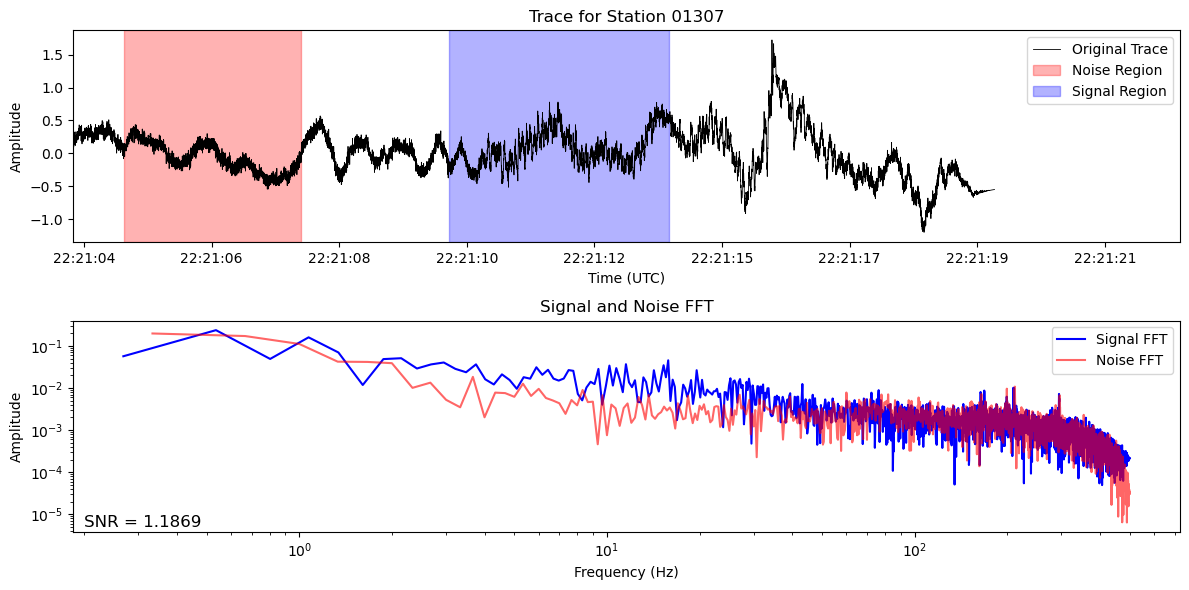

Results for Station #01258
  Fitted Omega_0: 0.21007802331215444
  Fitted f_c: 0.5000000000000008
  Fitted t*: 0.019963999978049287

Results for Station #01307
  Fitted Omega_0: 0.0016617195089568264
  Fitted f_c: 3.819501815542501
  Fitted t*: 1.8920327091413941e-22

Plot saved to ../results/20231001-2221/fiber-p/(100, 300)/omega_fit_resampled.png


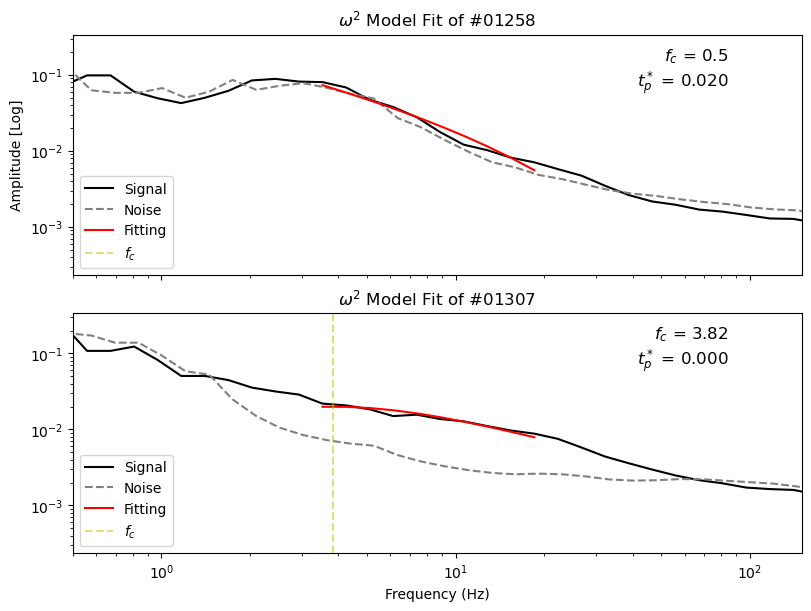

{'Q_error_neg': 0.3666577261734205,
 'Q_error_ori_neg': 0.7460270358156293,
 'Q_error_ori_pos': 1.7812094084174985,
 'Q_error_pos': 0.5123138662680327,
 'Q_error_re_neg': 0.48924382816162115,
 'Q_error_re_pos': 0.789362358982058,
 'Q_value': 2.579277978545022,
 'Q_value_ori': 2.5673357860387087,
 'Q_value_re': 2.573587583941168,
 'avg_snr': 1.1321351442605212,
 'depth_pair': '(100, 300)',
 'ds': 200,
 'event_date': '20231001-2221',
 'fit_fc': 2.159750907771251,
 'instrument_type': 'fiber',
 'omega_full_png': '../results/20231001-2221/fiber-p/(100, '
                   '300)/omega_full_combined.png',
 'original_full_png': '../results/20231001-2221/fiber-p/(100, '
                      '300)/original_full.png',
 'plot_dir': '../results/20231001-2221/fiber-p/(100, 300)',
 'resample_ratio_png': '../results/20231001-2221/fiber-p/(100, '
                       '300)/resample_ratio.png',
 'station1': '1258',
 'station2': '1307',
 'ts': 0.033077744788699764,
 'ts_error': 0.005481379228166118,


In [2]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from scripts.analysis_core import analyze_event

# 設定基本參數
event_date = "20231001-2221"
data_path = "/home/lulu/data/inci30"
output_path = "../results"
instrument_type = "fiber"   # "fiber" 或 "borehole"
wave_type = "p"             # "p" 或 "s"
depth_pair = (100, 300)     # 可放任意深度對

# 執行分析（建議加 plot True 試一次，之後大量分析可設為 False）
result = analyze_event(
    event_date=event_date,
    data_path=data_path,
    output_path=output_path,
    instrument_type=instrument_type,
    wave_type=wave_type,
    depth_pair=depth_pair,
    plot=True
)

import pprint
pprint.pprint(result)

print("Q (原始方法):", result['Q_value_ori'], "+", result['Q_error_ori_pos'], "-", result['Q_error_ori_neg'])
print("Q (重取樣):", result['Q_value_re'], "+", result['Q_error_re_pos'], "-", result['Q_error_re_neg'])
print("Q (omega擬合):", result['Q_value'], "+", result['Q_error_pos'], "-", result['Q_error_neg'])
print("原始法圖檔:", result.get('original_full_png'))
print("重取樣圖檔:", result.get('resample_ratio_png'))
print("omega-square圖檔:", result.get('omega_full_png'))